# Introduction to Data Analysis with Python
<img style="text-align: center;" src="https://1.bp.blogspot.com/-HORsJ3kKexU/XojJuMTT-CI/AAAAAAAAKhA/GdsCz9mRXjAd2AfzNN0lzlJPbC5Ie2HXwCLcBGAsYHQ/s1600/Data%2BAnalysis%2BCourse%2Bwith%2BPandas%2B-%2BHands%2Bon%2BPandas%252C%2BPython.jpg" width="300"/>

## Before we begin - Format for the meeting

* This meeting is due to run for three hours so do make sure you’re comfortable and have a drink with you.
* We will take a 10 minute break from 11:00-11:10
* As well as speaking you can also contribute to the meeting using the chat panel.
* Start with your camera on so that people can see a friendly face.
* Set your microphone to mute when you are not talking.
* Where possible use a headset to reduce background noise.

# Who am I?
 - 10 years of software development experience in industry (Python and Scala mostly)
 - Research Software Engineer in Advanced Research Computing
 - Part-time PhD in Computer Science in Deep Learning
 - Colleagues from ARC on hand to help

# Icebreaker 

 - Say briefly why you joined this course today in chat
 - If you have questions throughout the day, please put it into chat

# Basic information about today
 - Mixture of lecturing and hands on exercises. 
 - All materials are open source, including slides.
 - These will remain available after the course finishes, so don't worry if you do not get through all exercises.
 - If you notice issues, please contact me directly (jonathan.frawley@durham.ac.uk) or raise an issue on the GitHub repository: <github.com/jonathan>

# Outline of Day
 1. General introduction, NumPy, Matplotlib and probability (lecture 10:00-10:40, exercises 10:40-11:00)
 2. Break (11:00-11:10)
 3. Analysing Datasets using Pandas (lecture 11:10-11:30, exercises 11:30-11:50)
 4. Wrap up (11:50-12:00)

# Google Colab
<img style="text-align: center;" src="https://miro.medium.com/max/1400/1*8N7xbq6ahVvWkEq_S5EhMA.jpeg" alt="Google Colab logo" width="300"/>
 
 - Google Colab is a free system for running Python notebooks in the cloud
 - It supports a wide variety of Python libraries
 - Free access to state-of-the-art GPU hardware
 - We will use Google Colab for all exercises
 - Links and instructions are included on the main page
 - If you get the following: **Warning: This notebook was not authored by Google.**, click **Run anyway**
 - Test: <https://bit.ly/2KqGiet>

# Slides are all runnable as Colab notebooks
<https://bit.ly/2VNQR0z>

# Introduction to NumPy, Matplotlib and Probability

## Introduction to NumPy

Importing:

In [21]:
import numpy as np

## NumPy Basics
NumPy is a library used extensively by researchers with Python. It provides high-performance data structures and algorithms for common numerical operations.

We will go over some of the basics which will be used throughout this course.

First, let us create a random array of 1000 integers between 0 and 9:

In [22]:
arr = np.random.randint(0, high=10, size=1000) # Note (low is inclusive and high is exclusive)
arr.shape # The size of dimensions

(1000,)

In [23]:
arr[0:10]

array([2, 0, 9, 3, 7, 7, 4, 3, 2, 5])

Generating data in a normal distribution:

In [24]:
mean = 10
std = 5
n = np.random.normal(mean, std, 10000)
n.mean(), n.std()

(10.041372531867006, 4.985430611269343)

Get mean of array:

In [25]:
arr.mean()

4.609

Get standard deviation of array:

In [26]:
arr.std()

2.866726181552748

Find the number of entries in an array within a range:

In [27]:
np.sum(((arr > 4) & (arr < 8)))

281

## Percentiles

In [28]:
# 90th percentile
np.percentile(arr, 90)

9.0

# Introduction to Matplotlib

We are going to look at plotting of data using a library called [Matplotlib](https://matplotlib.org/). It is widely used, very flexible and is capable of producing publication-quality plots.

## Basic Example

We first need to import our dependencies:

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Next, we generate some sample data for plotting, based on a sin wave:

In [30]:
# Data for plotting
x_data = np.arange(0.0, 2.0, 0.01)
y_data = 1 + np.sin(2 * np.pi * x_data)

Next, we setup the plots. You can setup multiple subplots but here we just setup a single plot. Then we set the labels and title of the plot. Finally, we show it:

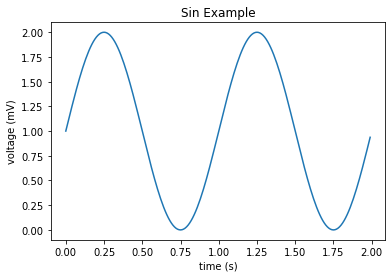

In [31]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data)
ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='Sin Example')
plt.show()

Let's try and change the labels, add a grid and change the colour:

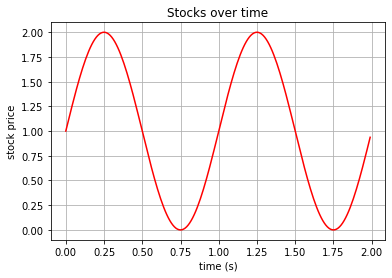

In [32]:
fig, ax = plt.subplots()
ax.plot(x_data, y_data, color='red')
ax.set(xlabel='time (s)', ylabel='stock price',
       title='Stocks over time')
ax.grid()
plt.show()

## Multiple subplots
You can also add multiple subplots with matplotlib:

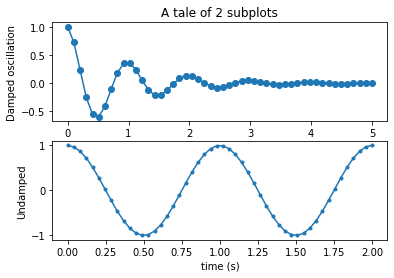

In [33]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## Histogram
Matplotlib can also be used to plot histograms of data:

First, lets generate some data in the normal distribution:

In [34]:
np.random.seed(19680801)
mu = 100  # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

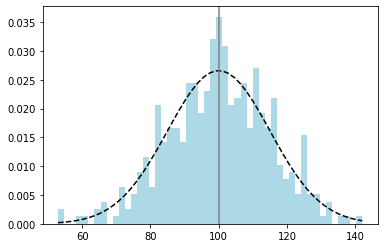

In [50]:
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1, color='lightblue')
# add a 'best fit' line
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
ax.plot(bins, y, '--', color='black')
plt.axvline(x=x.mean(), color='grey') # Plot vertical line
plt.show()

## Error Bars
You should include error bars when showing mean data from multiple samples.
This could include survey results or results of multiple runs of an experiment.
This shows how consistent or spread out your results are.

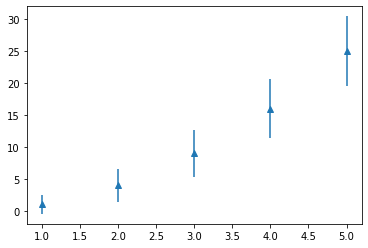

In [15]:
x = np.array([1, 2, 3, 4, 5])
y = np.power(x, 2) # Effectively y = x**2
e = np.array([1.5, 2.6, 3.7, 4.6, 5.5])

plt.errorbar(x, y, e, linestyle='None', marker='^')

plt.show()

# Very Brief Intro to Probability Theory

How likely is an event to occur?

## Probability Distribution Function (PDF)
This is best illustrated by an example.

Let us look at simulating the rolling of a dice 10000 times using NumPy's [randint](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html) function, plotting the number of results on a graph.

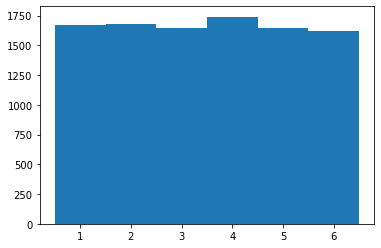

In [55]:
s = np.random.randint(1, high=7, size=10000)  # high is exclusive, so need to give 7
count, bins, ignored = plt.hist(s, bins=6, range=(0.5, 6.5))  # set range so x-axis are in middle of buckets
plt.show()

As we expected, we got a similar number of results for each of the sides. We can also plot this in such a way that the area under the graph sums to one:

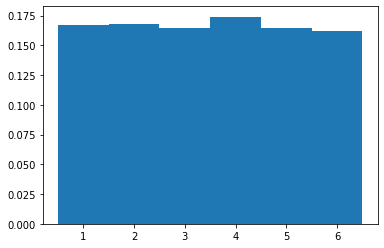

In [58]:
count, bins, ignored = plt.hist(s, bins=6, range=(0.5, 6.5), density=True)
plt.show()

This is what is known as a Probability Density Function (PDF). The above PDF represents an example of a probability distribution known as the uniform distribution.

## Normal Distribution
Probably the most important distribution is the Normal distribution. Also known as a bell-shaped curve or gaussian distribution.

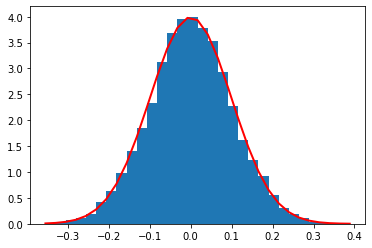

In [60]:
mean, std = 0, 0.1 # mean and standard deviation
s = np.random.normal(mean, std, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mean)**2 / (2 * std**2) ),
         linewidth=2, color='r')
plt.show()

You can see the simulated events in blue, and the ideal normal distribution in red.

## Mean

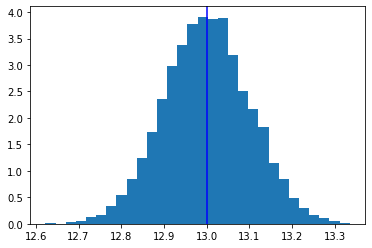

In [62]:
mean, sigma = 13, 0.1 # mean and standard deviation
s = np.random.normal(mean, sigma, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.axvline(x=s.mean(), color='b')

plt.show()

## Standard Deviation
Basically, how spread out your data is.

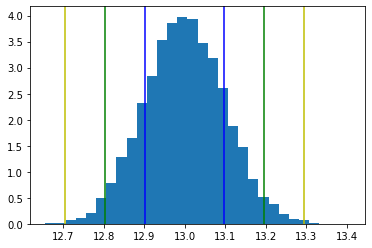

In [63]:
mean, sigma = 13, 0.1 # mean and standard deviation
s = np.random.normal(mean, sigma, 10000)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.axvline(x=s.mean()+s.std(), color='b')
plt.axvline(x=s.mean()-s.std(), color='b')
plt.axvline(x=s.mean()+s.std() * 2, color='g')
plt.axvline(x=s.mean()-s.std() * 2, color='g')
plt.axvline(x=s.mean()+s.std() * 3, color='y')
plt.axvline(x=s.mean()-s.std() * 3, color='y')
plt.show()

## Percentile
You can also get arbitrary percentiles. This is useful in certain scenarios where you want to ensure a Quality of Service (QoS). An example might be that an online service guarantees of uptime of 99%.

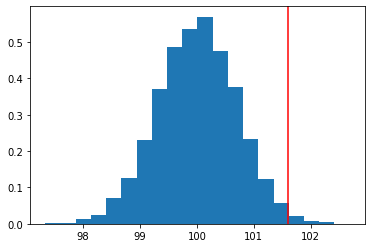

In [81]:
percentile = 99
mean, sigma = 100, 0.7
s = np.random.normal(mean, sigma, 10000)
count, bins, ignored = plt.hist(s, bins=20, density=True)

plt.axvline(x=np.percentile(s, percentile), color='r')

plt.show()

## Further Info
 - NumPy tutorial: https://docs.scipy.org/doc/numpy/user/quickstart.html
 - Matplotlib tutorial: https://matplotlib.org/tutorials/introductory/pyplot.html